### Imports

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### Demo 1 - Graph and Contour plot of Objective functions

In [49]:
# 3D plot function
from typing import Callable
import inspect

def plot_3d(func: Callable):
    """
    Plot the given function in 3D.
    """
    # generate test data
    x_range = [-3, 3]
    y_range = [-3, 3]
    (x, y) = np.meshgrid(np.linspace(x_range[0], x_range[1], 100),
                         np.linspace(y_range[0], y_range[1], 100))

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(projection='3d')

    # plot a 3D surface 
    z = func(x, y)
    surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.viridis,
                        linewidth=0, antialiased=False)
    
    # plot a contour projection
    cset = ax.contour(x, y, z, zdir='z', offset=0, cmap=cm.rainbow, alpha=0.7, levels=20)

    # set labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(f'Function: {inspect.getsource(func)}')

Define some optimization test problems and plot their objective functions.

See also: https://en.wikipedia.org/wiki/Test_functions_for_optimization

In [50]:
from dataclasses import dataclass
from typing import List
from numpy import exp, log, sqrt

@dataclass
class OptFunction:
    f: Callable
    df: Callable
    H: Callable
    xmin: List[float]


# Quadratic: f(x,y) = (x^2 + gamma * y^2) / 2
gamma = 1
quadratic_fn = OptFunction(
    f = lambda x, y: (x**2 + gamma * y**2) / 2,
    df = lambda x, y: [x, gamma*y],
    H = lambda x, y: [[1, 0], [0, gamma]],
    xmin = [0, 0]
)

# Rosenbrock: https://en.wikipedia.org/wiki/Rosenbrock_function
rosenbrock_fn = OptFunction(
    f = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2,
    df = lambda x, y: [2*x - 2 + 400*x*(x**2 - y), 200*(y - x**2)],
    H = lambda x, y: [[1200*x**2 - 400*y + 2, -400*x], [-400*x, 200]],
    xmin = [1, 1]
)

# Exponential, minimum in (log(sqrt(2)/2), 0) ~ (-0.347, 0), see slides
exponential_fn = OptFunction(
    f = lambda x, y: exp(x + 3*y - 0.1) + exp(x - 3*y - 0.1) + exp(-x - 0.1),
    df = lambda x, y: [exp(x+3*y-0.1)+exp(x-3*y-0.1)-exp(-x-0.1), 3*exp(x+3*y-0.1)-3*exp(x-3*y-0.1)],
    H = lambda x, y: [[exp(x+3*y-0.1)+exp(x-3*y-0.1)+exp(-x-0.1), 3*exp(x+3*y-0.1)-3*exp(x-3*y-0.1)],
                      [3*exp(x+3*y-0.1)-3*exp(x-3*y-0.1),         9*exp(x+3*y-0.1)+9*exp(x-3*y-0.1)]],
    xmin = [log(1/sqrt(2)), 0]
)

# Quartic: f(x,y) = (x^4 + gamma * y^4) / 4
quartic_fn = OptFunction(
    f = lambda x, y: (x**4 + gamma * y**4) / 4,
    df = lambda x, y: [x**3, gamma*y**3],
    H = lambda x, y: [[3*x**2,  0           ], 
                      [0,       3*gamma*y**2]],
    xmin = [0, 0]
)

test_fns = [quadratic_fn, rosenbrock_fn, exponential_fn, quartic_fn]

Create the surface plots

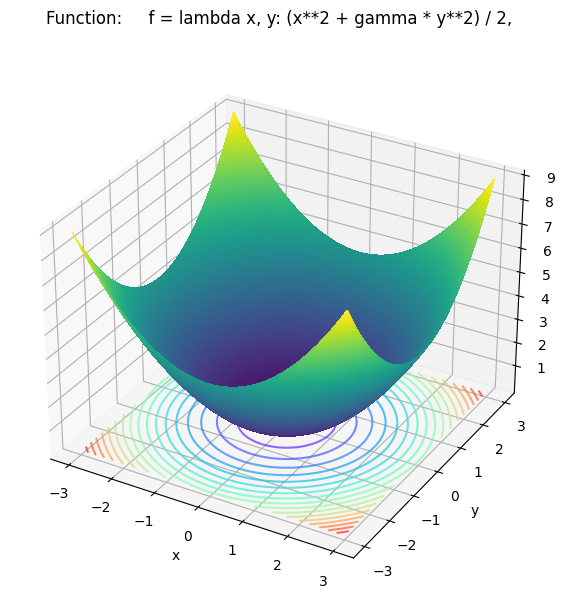

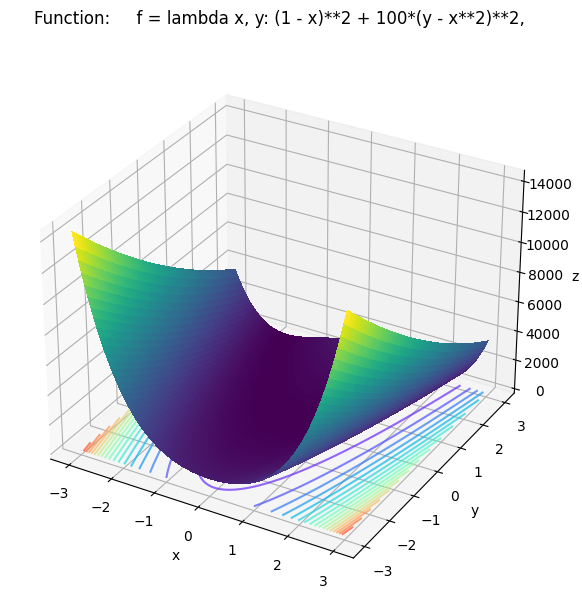

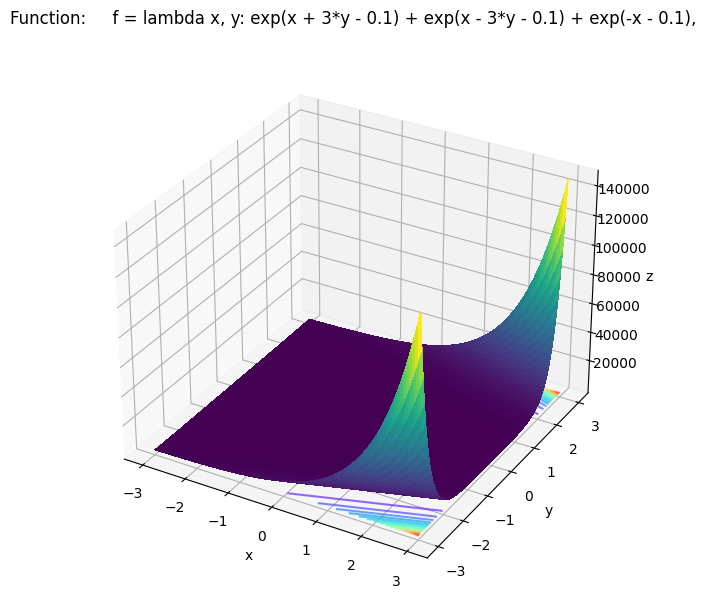

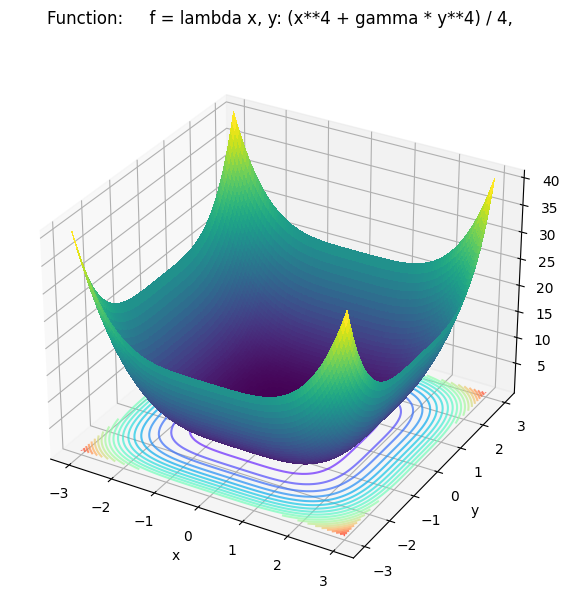

In [51]:
for fn in test_fns:
    plot_3d(fn.f)